In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization libraries
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

In [2]:
#import the data set - with encoding
stats_other = pd.read_csv('original/statistics_of_other_users.csv',
                          sep=';',
                          encoding_errors='replace')

stats_other.head(1)

,������������,������ ����,��������,������������.1,���� ����������
0,ivan.ptr@gmail.com,����� �������� �����������,Test,8,"May 29, 2024, 6:53 a.m."


In [3]:
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()

#decode the encoding
with open('original/statistics_of_other_users.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
print(detector.close())

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}


In [4]:
#import and decode the data set - using the correct encoding
stats_other = pd.read_csv('original/statistics_of_other_users.csv',
                          sep=';',
                          encoding='windows-1251')

stats_other.head(1)

,Пользователь,Лучший Урок,Открытие,Рекомендации,Дата Завершения
0,ivan.ptr@gmail.com,Тайны мусорных контейнеров,Test,8,"May 29, 2024, 6:53 a.m."


In [5]:
#find the dimensions
stats_other.shape

(56, 5)

In [6]:
#basic information
stats_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Пользователь     56 non-null     object
 1   Лучший Урок      56 non-null     object
 2   Открытие         56 non-null     object
 3   Рекомендации     56 non-null     int64 
 4   Дата Завершения  56 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [7]:
#for categorical features
stats_other.describe(include=object)

,Пользователь,Лучший Урок,Открытие,Дата Завершения
count,56,56,56,56
unique,35,7,35,35
top,ivan.ptr@gmail.com,В среде обитания,Test,"May 29, 2024, 6:53 a.m."
freq,2,12,2,2


In [8]:
#for numerical features
stats_other.describe().round()

,Рекомендации
count,56.0
mean,9.0
std,1.0
min,5.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


##### rename the features

In [9]:
#rename the columns
stats_other = stats_other.rename(columns={'Пользователь': 'User',
                                          'Лучший Урок': 'Best_Lesson',
                                          'Открытие': 'Opening',
                                          'Рекомендации': 'Recommendation',
                                          'Дата Завершения': 'Completion_Day'                                             
})

##### check for duplicates

In [10]:
#check for duplicate values
dupl_columns = list(stats_other.columns)

mask = stats_other.duplicated(subset=dupl_columns)
stats_duplicates = stats_other[mask]
print(f'Number of Duplicates: {stats_duplicates.shape[0]}')

Number of Duplicates: 0


##### check for null values

In [11]:
#check for null values
stats_other.isnull().sum()[stats_other.isnull().sum() > 0]

Series([], dtype: int64)

##### unique values

In [12]:
#find how unique each feature is
print(f"Number of Unique Users: {stats_other['User'].nunique()}")
print(f"Number of Unique Lessons: {stats_other['Best_Lesson'].nunique()}")
print(f"Number of Unique Opening: {stats_other['Opening'].nunique()}")
print(f"Number of Unique Recommendation: {stats_other['Recommendation'].nunique()}")
print(f"Number of Unique Completion_Day: {stats_other['Completion_Day'].nunique()}")

Number of Unique Users: 35
Number of Unique Lessons: 7
Number of Unique Opening: 35
Number of Unique Recommendation: 5
Number of Unique Completion_Day: 35


##### lessons

In [13]:
print(f"Unique Lessons: {stats_other['Best_Lesson'].unique()}")

Unique Lessons: ['Тайны мусорных контейнеров' 'В среде обитания'
 'Идём по углеродному следу' 'Пульс городских вод' 'Свет фонарей'
 'Дышим свежим воздухом' 'Городская симфония']


##### recommendation

In [14]:
print(f"Unique Recommendation: {stats_other['Recommendation'].unique()}")

Unique Recommendation: [ 8  5 10  7  9]


assume recommendation score: 0-10

##### opening

In [15]:
print(f"Unique Opening: {stats_other['Opening'].unique()}")

Unique Opening: ['Test' 'dasd' '13123123' 'Тайны «мусорных» контейнеров'
 'Что можно так спокойно наблюдать за окружающей средой и действительно наслаждаемся прогулками.'
 'Медея'
 'Ночью тихо , но воздух тяжелее, чем днём, хотя люди привыкли считать наоборот! Поэтому ночные прогулки не очень полезны для здоровья человека!'
 'ииии' 'Замечать, сколько ресурсов потрачено на создание вещи.' '.....'
 'Количество мусора нужно сократить у себя дома, чтобы воздух стал чище'
 'Меня очень впечатлил курс в аудио формате. Как много не замечаем, вечно бежим. Тайны мусорных контейнеров на первом месте. Как важно, следить за чистотой, просто не мусоря, или подняв фантик. Это важно. Важно донести детям это'
 '123' 'Сколько оттенков у темноты' 'ррподлрол'
 'Углеродный след от любых предметов в среде обитания человека.'
 '8 аудио прогулок, которые дают человеку теоретические знания. И приходит осознание, что мы должны беречь свою Землю. А не быть злостными потребителями природных богатств . Мы в гармон

##### completion day

In [16]:
#separate the date into specific elements
stats_other['Month_Day'] = stats_other.Completion_Day.str.split(',').str[0]
stats_other['Year'] = stats_other.Completion_Day.str.split(',').str[1]
stats_other['Time'] = stats_other.Completion_Day.str.split(',').str[-1]

In [17]:
#find all the sequence of numbers
regex2 = '\d{2}'
regex1 = '\d{1}'

#find the sequence of 2-digit numbers
stats_other['Day2'] = stats_other['Month_Day'].str.findall(regex2).str.get(0)

#find the sequence of 1-digit numbers
stats_other['Day1'] = stats_other['Month_Day'].str.findall(regex1).str.get(0)

In [18]:
#fill any blanks with 0
stats_other['Day1'] = stats_other['Day1'].fillna(0)
stats_other['Day2'] = stats_other['Day2'].fillna(0)

In [19]:
#convert the day into one feature based on conditions set
def convert_day(data):
    if (int(data['Day2']) > int(data['Day1'])):
        return int(data['Day2'])
    else:
        return int(data['Day1'])

#create a new column by applying the function
stats_other['Day'] = stats_other.apply(convert_day,
                                       axis=1)

In [20]:
import re

#find the sequence of text only
def find_text(data):
    feature = str(data['Month_Day'])
    result = re.findall(r"(?i)\b[a-z]+\b", feature)
    result = str(result)
    result = result.replace('[', '').replace(']', '').replace("'", "")
    return result

#create a new feature by applying the function
stats_other['Month'] = stats_other.apply(find_text,
                                           axis=1)

In [21]:
#replace values
stats_other['Time'] = stats_other.Time.str.replace('.', '')

#create new time features
stats_other['Hour_Minute'] = stats_other['Time'].str[:-3]
stats_other['Period'] = stats_other['Time'].str[-2:]

In [22]:
#drop uninformation features
stats_other = stats_other.drop(['Day1', 'Day2', 'Month_Day', 'Time'],
                               axis=1,
                               errors='ignore')

##### data types

In [23]:
#convert the data types
stats_other['User'] = stats_other['User'].astype('string')
stats_other['Best_Lesson'] = stats_other['Best_Lesson'].astype('string')
stats_other['Opening'] = stats_other['Opening'].astype('string')
stats_other['Recommendation'] = stats_other['Recommendation'].to_numpy('int8')
stats_other['Completion_Day'] = stats_other['Completion_Day'].astype('string')

stats_other['Year'] = stats_other['Year'].to_numpy('int16')
stats_other['Month'] = stats_other['Month'].astype('string')
stats_other['Day'] = stats_other['Day'].to_numpy('int8')

stats_other['Hour_Minute'] = stats_other['Hour_Minute'].astype('string')
stats_other['Period'] = stats_other['Period'].astype('string')

#### **Visualization**

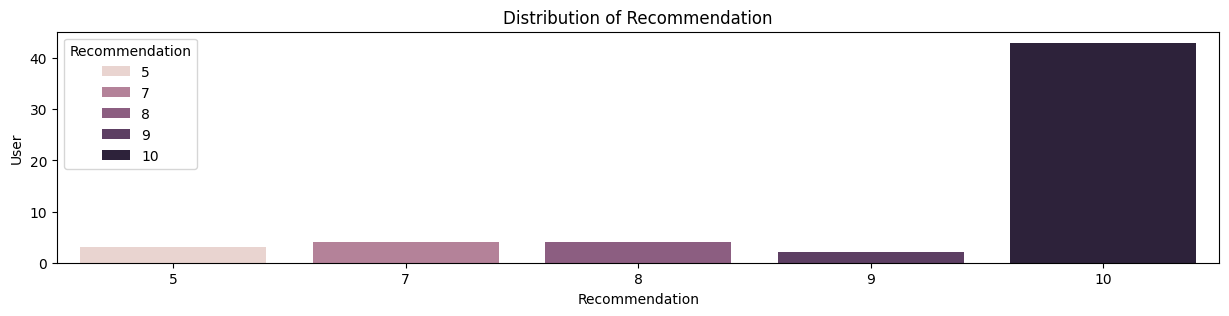

In [24]:
#group by recommendation
user_recommendation = stats_other.groupby('Recommendation')['User'].count().sort_values(ascending=False).nlargest(11)
user_recommendation = pd.DataFrame(user_recommendation)

#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(user_recommendation,
                 x='Recommendation',
                 y='User',
                 hue='Recommendation').set(title='Distribution of Recommendation');

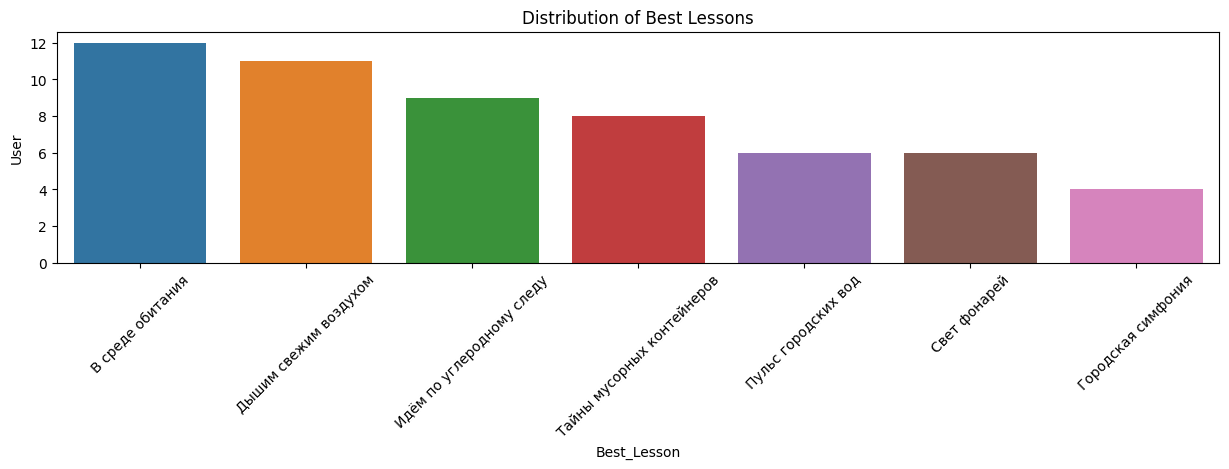

In [25]:
#group by recommendation
user_lesson = stats_other.groupby('Best_Lesson')['User'].count().sort_values(ascending=False).nlargest(11)
user_lesson = pd.DataFrame(user_lesson)

#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(user_lesson,
                 x='Best_Lesson',
                 y='User',
                 hue='Best_Lesson').set(title='Distribution of Best Lessons')

plt.xticks(rotation=45);

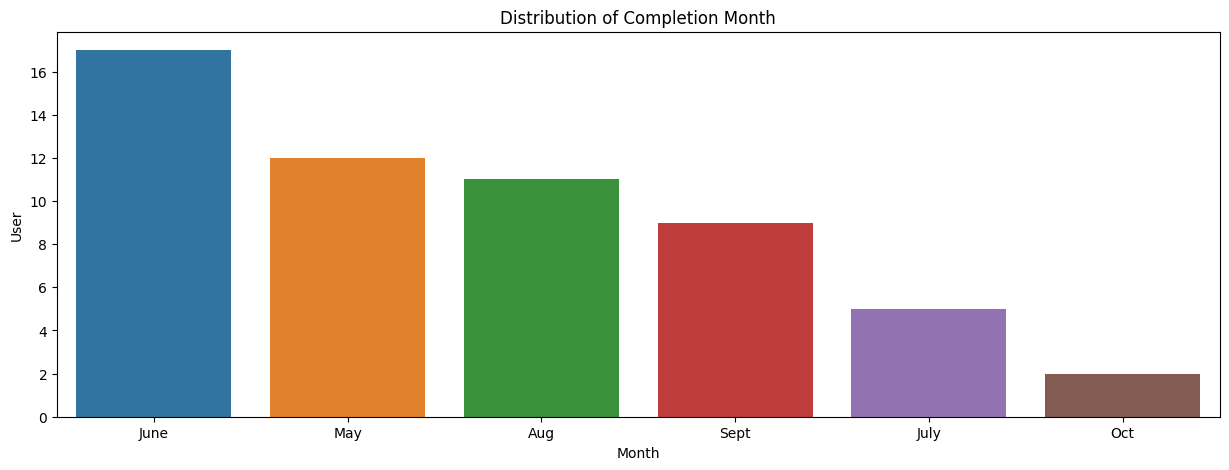

In [26]:
#group month per user
month_by_user = stats_other.groupby('Month')['User'].count().sort_values(ascending=False)
month_by_user = pd.DataFrame(month_by_user)

#set the canvas
plt.figure(figsize=(15, 5))

ax = sns.barplot(month_by_user,
                 x='Month',
                 y='User',
                 hue='Month',).set(title='Distribution of Completion Month');

#### **Export**

In [27]:
#create a file name
xlx_name = 'user_other_details.xlsx'

#save to excel
stats_other.to_excel('./adjusted/' + xlx_name,
                     sheet_name='other_statistics')